In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('.\ds_titanic.csv')

In [7]:
df_copy=df.copy()

In [8]:
df_copy.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# a) Exploración inicial

In [9]:
df_copy.shape

(891, 12)

In [10]:
df_copy.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df_copy.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<b>Description:</b><br>

Id: Passenger ID 

Survived: Indicates if the passenger survived.

Class: passenger class first(1), second (2) or third (3)

Name: Passenger's name

Sex: Passenger's sex

Age: Age

SibSp: Number of sisters/sisters or spouses on board

Parch: Number of parents or children on board

Ticket: Ticket number

Fare: Fare cost

Cabin: Cabin in which the passenger is located

Embarked: Passenger boarding area

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


SURVIVED

In [13]:
df_copy.loc[:,"Survived"].replace(to_replace=[0,1],value=["No","Yes"],inplace=True)
df_copy['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

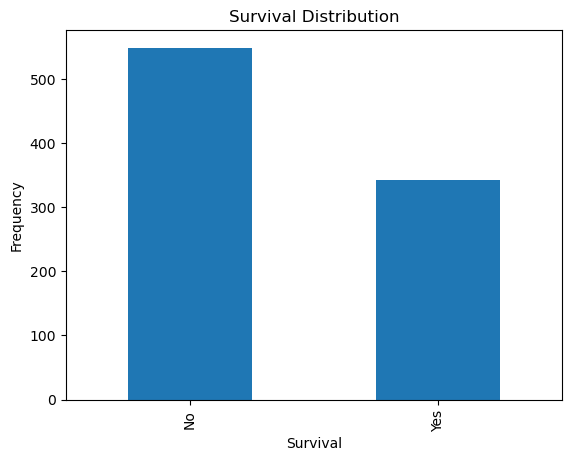

In [14]:
survival_distribution=df_copy['Survived'].value_counts().plot.bar(title="Survival Distribution",xlabel='Survival',
                                                                  ylabel="Frequency")

AGE

Text(0, 0.5, 'Frecuency')

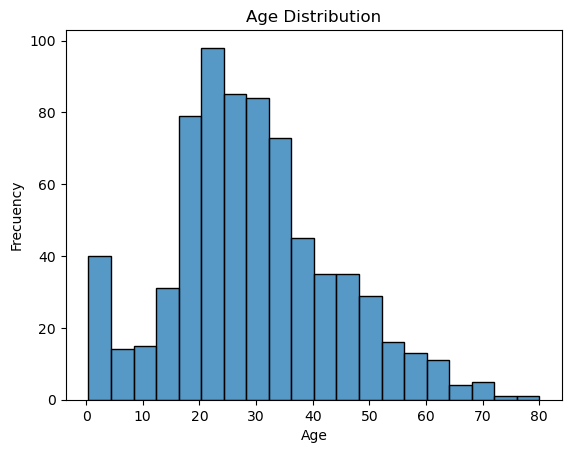

In [15]:
age_hist= sns.histplot(data=df_copy['Age'])
age_hist.set_title('Age Distribution')
age_hist.set_xlabel('Age')
age_hist.set_ylabel('Frecuency')  

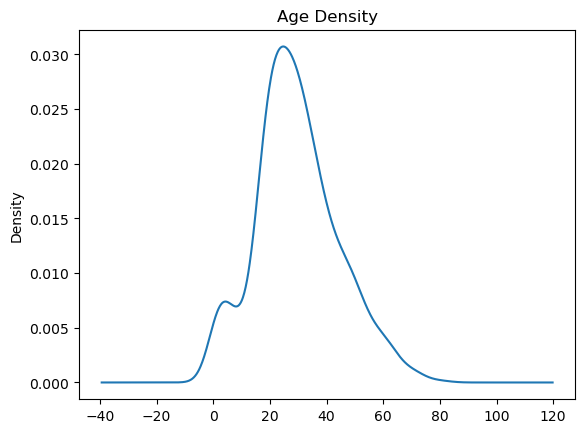

In [16]:
age_dens=df_copy['Age'].plot.kde(title="Age Density",xlabel='Age',ylabel="Density", linestyle='-')

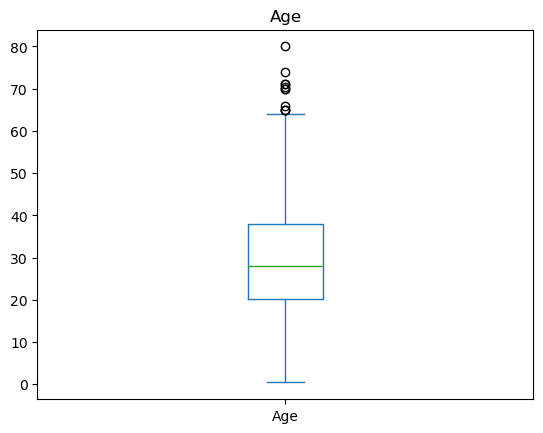

In [17]:
age_box=df_copy['Age'].plot.box(title="Age")

CLASE 

In [18]:
df_copy.rename(columns={'Pclass':'Class'}, inplace=True)
df_copy['Class'].value_counts()

3    491
1    216
2    184
Name: Class, dtype: int64

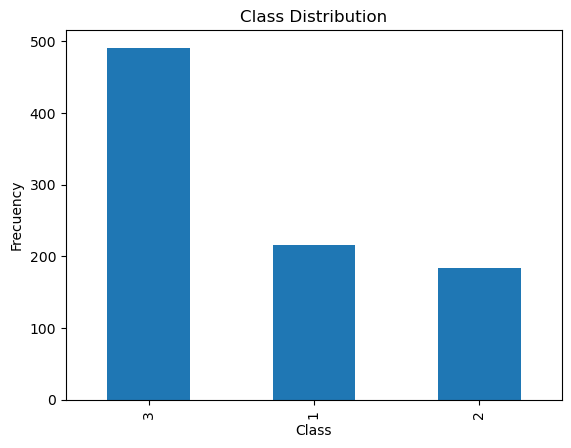

In [19]:
v_class_bar=df_copy['Class'].value_counts().plot.bar(title="Class Distribution",xlabel="Class",ylabel="Frecuency")

GENDER

In [20]:
df_copy['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

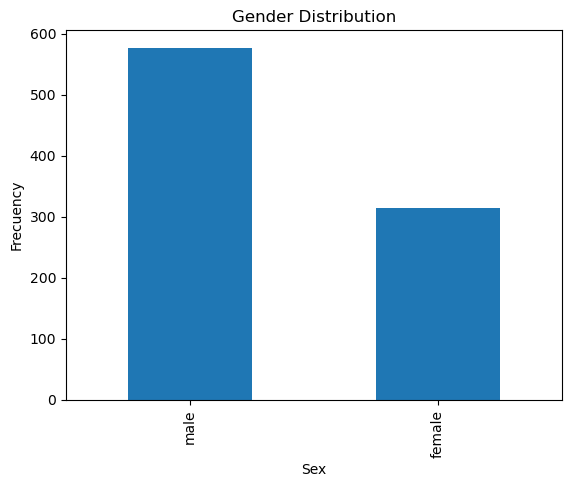

In [21]:
sex_bar=df_copy['Sex'].value_counts().plot.bar(title="Gender Distribution",xlabel="Sex",ylabel="Frecuency")

FARE

Text(0, 0.5, 'Frecuency')

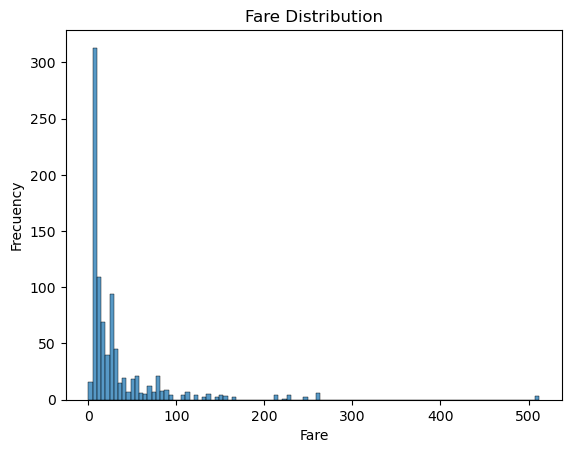

In [22]:
fare_hist= sns.histplot(data=df_copy['Fare'])
fare_hist.set_title('Fare Distribution')
fare_hist.set_xlabel('Fare')
fare_hist.set_ylabel('Frecuency')  

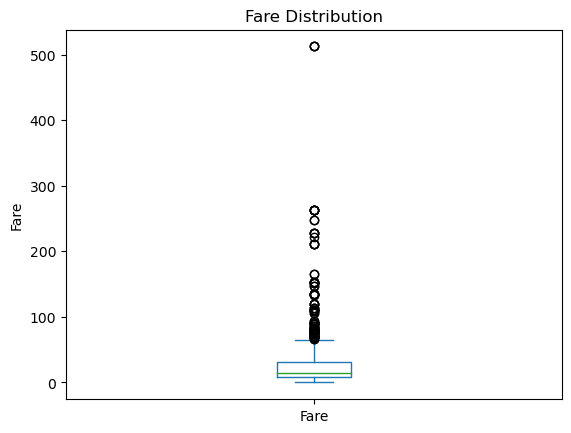

In [23]:
fare_box=df_copy['Fare'].plot.box(title="Fare Distribution", ylabel='Fare', xlabel='Fare')

CABIN

In [24]:
df_copy['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

BOARDING AREA

In [25]:
df_copy['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

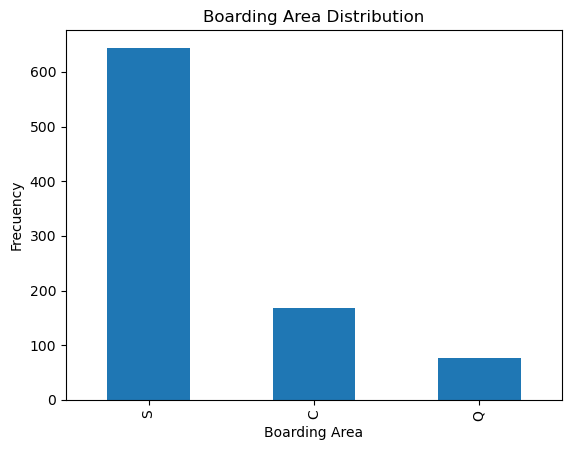

In [26]:
v_embarked_bar=df_copy['Embarked'].value_counts().plot.bar(title="Boarding Area Distribution",xlabel="Boarding Area",
                                                           ylabel="Frecuency")

# Visualización de datos


Text(0, 0.5, 'Frecuency')

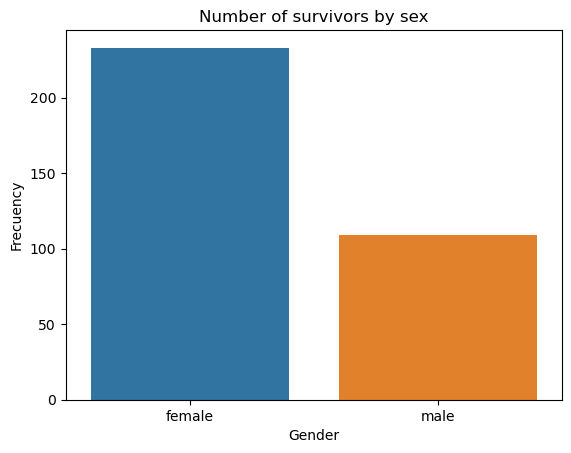

In [27]:
survived_by_sex= df.groupby('Sex')['Survived'].sum().reset_index() 
bar_survived_by_sex=sns.barplot(x='Sex', y='Survived', data= survived_by_sex)
bar_survived_by_sex.set_title('Number of survivors by sex')
bar_survived_by_sex.set_xlabel('Gender')
bar_survived_by_sex.set_ylabel('Frecuency')

Text(0, 0.5, 'Rate')

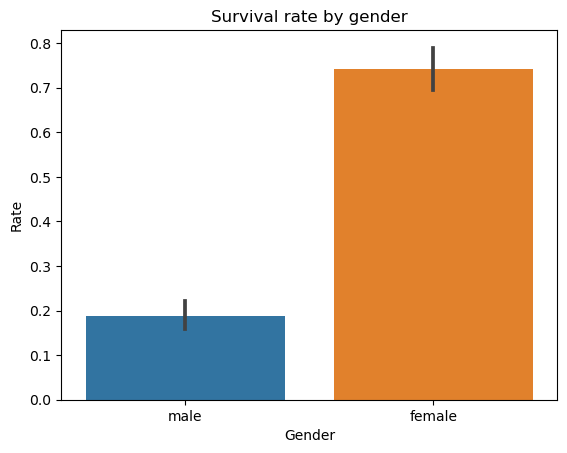

In [28]:
bar_rate_survived_by_sex=sns.barplot(x='Sex', y='Survived', data= df)
bar_rate_survived_by_sex.set_title('Survival rate by gender')
bar_rate_survived_by_sex.set_xlabel('Gender')
bar_rate_survived_by_sex.set_ylabel('Rate')

Los sobrevivientes femeninos doblo la cantidad de sobrevivientes masculinos. Y las tasas de supervivencia se ubican alrededor de 0.2 y 0.8 para masculinos y femeninos respectivamente. 

Text(24.000000000000007, 0.5, 'Rate')

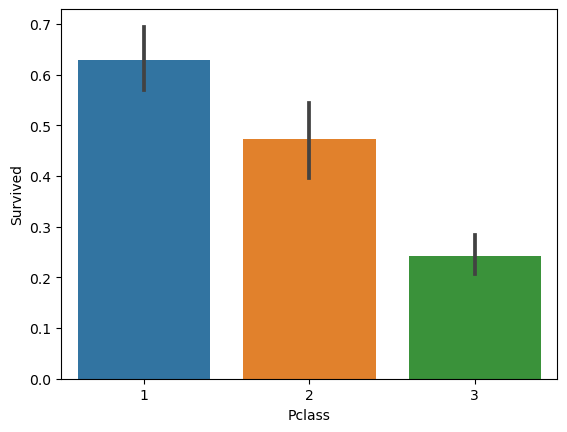

In [29]:
bar_rate_survived_by_class=sns.barplot(x='Pclass', y='Survived', data= df)
bar_rate_survived_by_sex.set_title('Survival rate by class')
bar_rate_survived_by_sex.set_xlabel('Class')
bar_rate_survived_by_sex.set_ylabel('Rate')

Text(0, 0.5, 'Frecuency')

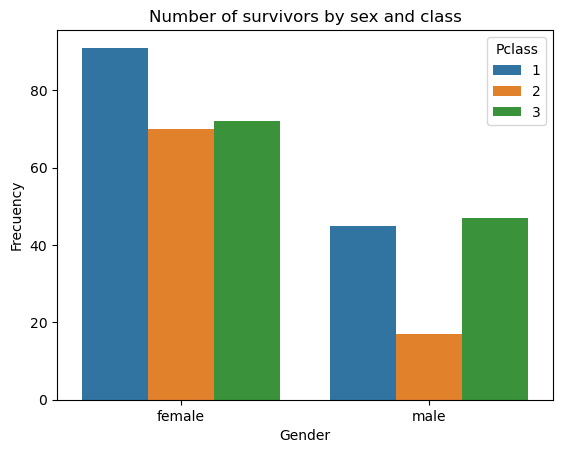

In [30]:
survived_by_sex_class= df.groupby(['Pclass', 'Sex'])['Survived'].sum().reset_index() 
bar_survived_by_sex_class=sns.barplot(x='Sex', y= 'Survived',hue="Pclass",data=survived_by_sex_class)
bar_survived_by_sex_class.set_title('Number of survivors by sex and class')
bar_survived_by_sex_class.set_xlabel('Gender')
bar_survived_by_sex_class.set_ylabel('Frecuency')

La tasa de supervivencia disminuia en forma decreciente desde la primera clase hasta la tercera. La primera clase tiene una tasa de supervivencia superior al 0.6, la segunda clase tiene una inferior al 0.5 y la tercera clase apenas supera el 0.2.
Las mujeres de primera clase tenían altas probabilidades de sobrevivir, en cambio, ser hombre de clase baja te daba pocas o nulas posibilidades de sobrevivir a la tragedia.

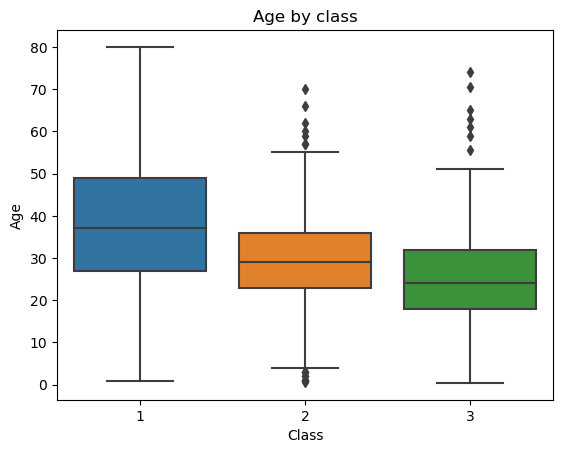

In [31]:
age_class_box=sns.boxplot(x="Class",y="Age", data=df_copy).set(title="Age by class",xlabel='Class',ylabel='Age')

La dispersión de la edad de los pasajeros se encuentra entre los 0 a los 80 años de edad. La misma disminuía decrecientemente por clase. El 75% de las personas de la primera clase eran menores a 50 años, en la segunda clase no superaba los 40 años y en la tercera apenas los 32 años. 

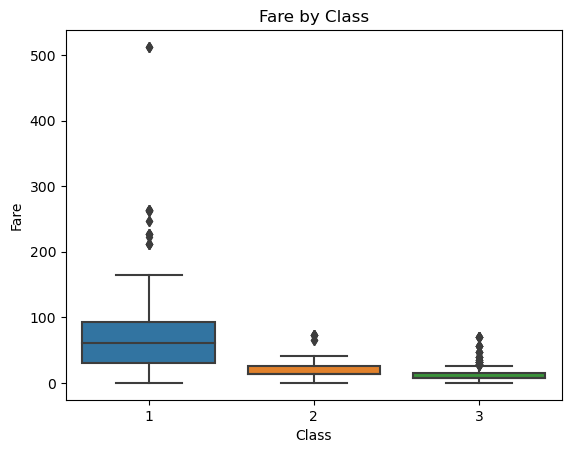

In [32]:
fare_class_box=sns.boxplot(x="Class",y="Fare", data=df_copy).set(title="Fare by Class",xlabel='Class',ylabel='Fare')

Text(0, 0.5, 'Fare')

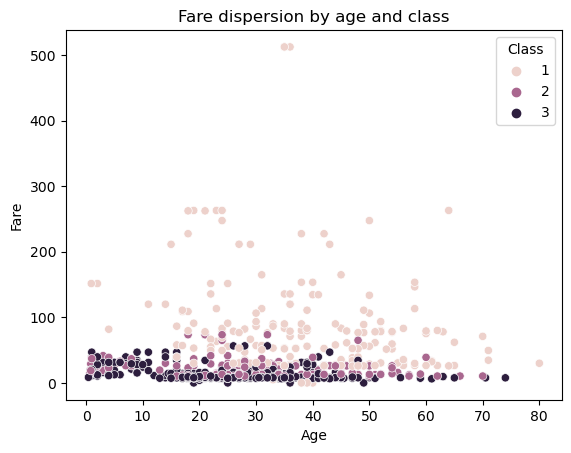

In [33]:
disp_age_by_fare_class=sns.scatterplot(data=df_copy, x="Age", y="Fare", hue='Class')
disp_age_by_fare_class.set_title('Fare dispersion by age and class')
disp_age_by_fare_class.set_xlabel('Age')
disp_age_by_fare_class.set_ylabel('Fare')

Text(0, 0.5, 'Fare')

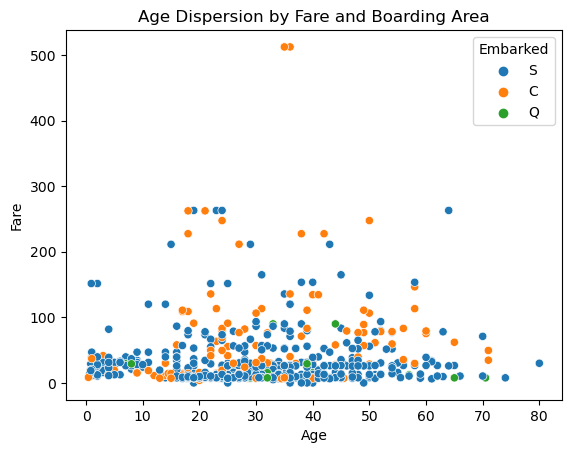

In [34]:
disp_age_by_fare_embarked=sns.scatterplot(data=df_copy, x="Age", y="Fare", hue='Embarked')
disp_age_by_fare_embarked.set_title('Age Dispersion by Fare and Boarding Area')
disp_age_by_fare_embarked.set_xlabel('Age')
disp_age_by_fare_embarked.set_ylabel('Fare')

El costo de la tarifa aumentaba a medida que aumentaba la clase del pasajero. Mayor la clase, más alto era el costo del pasaje. Podemos observar registros con tarifas superiores a los máximos de cada clase, que nos dicen que algunos pasajeros pagaron precios superiores a lo correspondiente. 

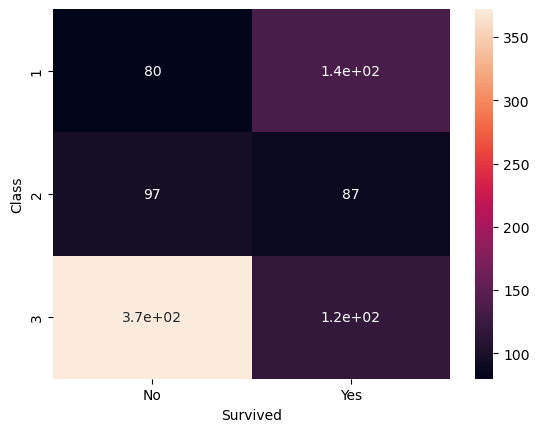

In [35]:
class_by_survived=pd.crosstab(df_copy['Class'], df_copy['Survived'])
heat_class_by_survived=sns.heatmap(class_by_survived,annot=True)

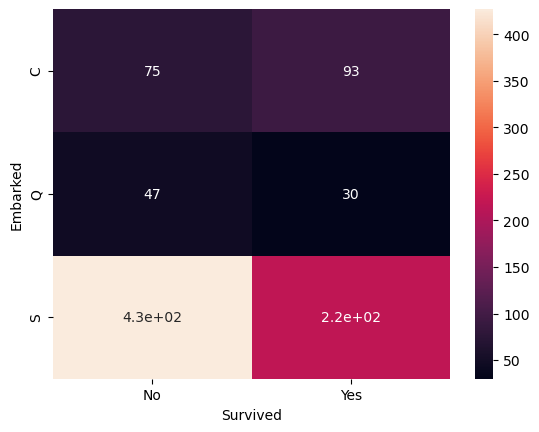

In [36]:
embarked_by_survived=pd.crosstab(df_copy['Embarked'], df_copy['Survived'])
heat_embarked_by_survived=sns.heatmap(embarked_by_survived,annot=True)

In [37]:
df_copy_corr= df_copy[['Age', 'Fare']]
df_copy_corr.corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


<AxesSubplot:>

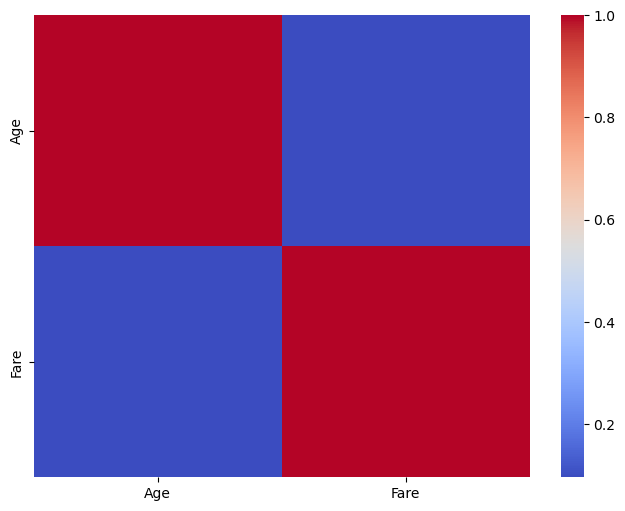

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(df_copy_corr.corr(),cbar= True, cmap='coolwarm')

## c)Datos faltantes

In [39]:
df_copy.isnull()

,PassengerId,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
df_copy.isnull().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Class            0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [41]:
for column in df_copy.columns:
    percentage = df_copy[column].isnull().mean()
    print(column +' : '+ str(round(percentage*100,2))+ ' %')  

PassengerId : 0.0 %
Survived : 0.0 %
Class : 0.0 %
Name : 0.0 %
Sex : 0.0 %
Age : 19.87 %
SibSp : 0.0 %
Parch : 0.0 %
Ticket : 0.0 %
Fare : 0.0 %
Cabin : 77.1 %
Embarked : 0.22 %


In [42]:
df_modified=df[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'SibSp','Parch', 'Fare']]
df_cleaned= df_modified.dropna()

In [43]:
df_cleaned= pd.get_dummies(df_cleaned,columns=['Sex','Embarked', 'Pclass' ], drop_first=True)

In [44]:
df_cleaned.head(5)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [45]:
df_features=[ 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3']

# Árbol de decisión

In [127]:
import sklearn as sk
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, recall_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

In [47]:
train_set, test_set = train_test_split(df_cleaned, test_size=0.3, random_state=72)

In [48]:
train_set_x= train_set.drop(columns=['Survived'])
train_set_y= train_set['Survived']
test_set_x=test_set.drop(columns=['Survived'])
test_set_y=test_set['Survived']

Cross Validation: Randomized Search

In [49]:
params = {'criterion':['gini','entropy'],'ccp_alpha':np.linspace(0,0.005,10)}
kfold= StratifiedKFold(n_splits=5)
tree= DecisionTreeClassifier()
scorer = make_scorer(sk.metrics.f1_score)
Rcv= RandomizedSearchCV(estimator=tree,param_distributions=params, scoring=scorer, cv=kfold, n_iter=10 )

In [50]:
Rcv.fit(train_set_x, train_set_y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': array([0.        , 0.00055556, 0.00111111, 0.00166667, 0.00222222,
       0.00277778, 0.00333333, 0.00388889, 0.00444444, 0.005     ]),
                                        'criterion': ['gini', 'entropy']},
                   scoring=make_scorer(f1_score))

In [51]:
Rcv.cv_results_['mean_test_score']

array([0.74434969, 0.72751889, 0.69172587, 0.7366706 , 0.69864042,
       0.68931436, 0.69875713, 0.69551737, 0.67317228, 0.69462008])

In [52]:
print(Rcv.best_params_)
print(Rcv.best_score_)

{'criterion': 'gini', 'ccp_alpha': 0.0038888888888888888}
0.7443496887852142


In [53]:
feat_imp= Rcv.best_estimator_.feature_importances_
for feat_imp,feat in sorted(zip(feat_imp,df_features)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

Parch: 0.013394151883171928
Pclass_2: 0.018685958581057302
SibSp: 0.04500235605782922
Pclass_3: 0.13185527928305843
Fare: 0.16460644032129593
Age: 0.17185673612042812
Sex_male: 0.4545990777531591


In [54]:
tree_best= DecisionTreeClassifier(max_depth= 3, criterion= 'entropy', ccp_alpha= 0.0022222222222222222)
tree_trained_best=tree_best.fit(train_set_x, train_set_y)

In [55]:
tree_rules = export_text(tree_best, feature_names=[ 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3'])
print(tree_rules)

|--- Sex_male <= 0.50
|   |--- Pclass_3 <= 0.50
|   |   |--- Fare <= 29.36
|   |   |   |--- class: 1
|   |   |--- Fare >  29.36
|   |   |   |--- class: 1
|   |--- Pclass_3 >  0.50
|   |   |--- Fare <= 20.80
|   |   |   |--- class: 1
|   |   |--- Fare >  20.80
|   |   |   |--- class: 0
|--- Sex_male >  0.50
|   |--- Age <= 9.50
|   |   |--- SibSp <= 2.00
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.00
|   |   |   |--- class: 0
|   |--- Age >  9.50
|   |   |--- Fare <= 26.14
|   |   |   |--- class: 0
|   |   |--- Fare >  26.14
|   |   |   |--- class: 0



In [56]:
y_predict_best=tree_trained_best.predict(test_set_x)

In [57]:
recall= recall_score(test_set_y, y_predict_best)
accuracy_test_set= accuracy_score(test_set_y, y_predict_best)
f1_score_test_set= f1_score(test_set_y, y_predict_best)
print('Recall', recall)
print( 'Accuracy',accuracy_test_set)
print('f1 score', f1_score_test_set)

Recall 0.7647058823529411
Accuracy 0.8457943925233645
f1 score 0.7975460122699386


Text(50.722222222222214, 0.5, 'True')

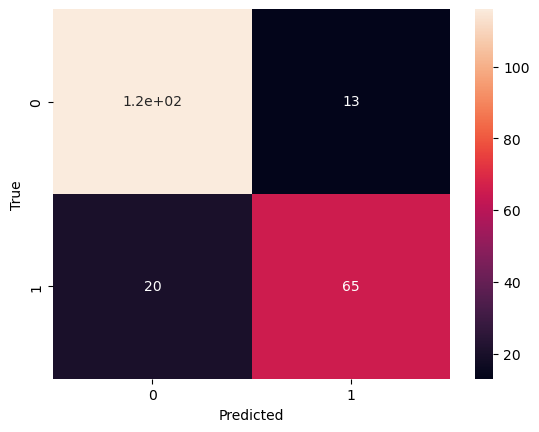

In [58]:
conf_mat=confusion_matrix(test_set_y, y_predict_best)
hm_tree=sns.heatmap(conf_mat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

## Random forest

In [145]:
randomForest_cv = RandomForestClassifier(random_state=1)

param_rf = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50,100,150] }
Rfcv= RandomizedSearchCV(estimator=randomForest_cv, random_state=2, param_distributions=param_rf,refit=False,  scoring=['accuracy','f1'], cv=kfold, n_iter=10 )

In [146]:
rf=Rfcv.fit(train_set_x, train_set_y)

In [147]:
parametros_elegidos=Rfcv.cv_results_['params'][np.argmax(Rfcv.cv_results_['mean_test_f1'])]
parametros_elegidos

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'criterion': 'gini'}

In [152]:
best_r_f= RandomForestClassifier(random_state=1,n_estimators= 50,min_samples_split= 10,min_samples_leaf= 1,
criterion= 'gini' )
trained_best_r_f= best_r_f.fit(train_set_x, train_set_y)
pred_y_r_f=trained_best_r_f.predict(test_set_x)

In [153]:
recall_r_f= recall_score(test_set_y, pred_y_r_f)
accuracy_r_f= accuracy_score(test_set_y, pred_y_r_f)
f1_score__r_f= f1_score(test_set_y, pred_y_r_f)
print('Recall', recall_r_f)
print( 'Accuracy',accuracy_r_f)
print('f1 score', f1_score__r_f)

Recall 0.7058823529411765
Accuracy 0.8177570093457944
f1 score 0.7547169811320755


In [154]:
print(classification_report(test_set_y, pred_y_r_f))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       129
           1       0.81      0.71      0.75        85

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.80       214
weighted avg       0.82      0.82      0.82       214



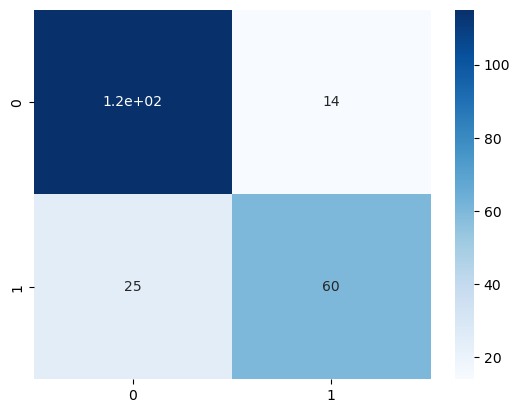

In [155]:
conf_matrix=sns.heatmap(confusion_matrix(test_set_y, pred_y_r_f), cmap='Blues',annot=True)